
# Índice de popularidade do governo
---
Anáise de índices economicos que impactam na poupularidade do governo brasileiro

* Lucas Falbo




# Dependências

In [1]:
install.packages("urca")
install.packages("gridExtra")
install.packages("stargazer")
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(gridExtra)
library(readxl)
library(stargazer)
library(tidyverse)
library(urca)
library(zoo)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()    masks base::%||%()
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# Base de Dados

Dados já foram extraídos das fontes e consolidados em um só arquivo de input visando otimizar a apresentação.

In [3]:
file_path <- "https://github.com/kepa/econ-satisfaction/raw/main/base_dados.csv"
download.file(file_path, "base_dados.csv")
dados <- as.data.frame(read_csv("base_dados.csv"))

New names:
• `` -> `...1`
Rows: 85 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): presidente
dbl  (18): ...1, mandato, otimo, regular, ruim, n_sabe, desemprego, year, ic...
date  (2): month, Data

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#Primeiras 5 linhas do data frame
head(dados,5)

,...1,month,presidente,mandato,Data,otimo,regular,ruim,n_sabe,desemprego,⋯,icc,varejo,usd_brl,div_gov,ibc,ipca,pib,sal_min,selic,ibovespa
,<dbl>,<date>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2003-04-01,Luiz Inácio Lula da Silva,1,2003-04-01,43,40,10,7,11.2,⋯,107.66,47.17676,2.8890,53.36,100.98,16.77,1564350,240,26.32,11592
2,2,2003-08-01,Luiz Inácio Lula da Silva,1,2003-08-22,45,42,10,3,13.0,⋯,109.37,48.07981,2.9657,54.60,99.79,15.07,1629693,240,23.50,13130
3,3,2003-10-01,Luiz Inácio Lula da Silva,1,2003-10-29,42,44,11,3,12.9,⋯,104.72,48.74898,2.8554,51.37,101.91,13.98,1680139,240,19.54,16579
4,4,2003-12-01,Luiz Inácio Lula da Silva,1,2003-12-15,42,41,15,2,10.9,⋯,115.33,49.38891,2.8884,52.46,101.75,9.30,1717950,240,16.91,20521
5,5,2004-03-01,Luiz Inácio Lula da Silva,1,2004-03-01,38,43,17,2,12.8,⋯,113.29,51.28354,2.9078,51.75,105.82,5.89,1765492,240,16.19,22499


In [5]:
#Estrutura do data frame
str(dados)

'data.frame':	85 obs. of  21 variables:
 $ ...1      : num  1 2 3 4 5 6 7 8 9 10 ...
 $ month     : Date, format: "2003-04-01" "2003-08-01" ...
 $ presidente: chr  "Luiz Inácio Lula da Silva" "Luiz Inácio Lula da Silva" "Luiz Inácio Lula da Silva" "Luiz Inácio Lula da Silva" ...
 $ mandato   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Data      : Date, format: "2003-04-01" "2003-08-22" ...
 $ otimo     : num  43 45 42 42 38 45 36 35 35 28 ...
 $ regular   : num  40 42 44 41 43 40 44 45 40 42 ...
 $ ruim      : num  10 10 11 15 17 13 19 18 23 28 ...
 $ n_sabe    : num  7 3 3 2 2 1 1 1 1 2 ...
 $ desemprego: num  11.2 13 12.9 10.9 12.8 9.6 9.4 10.2 9.4 9.4 ...
 $ year      : num  2003 2003 2003 2003 2004 ...
 $ icc       : num  108 109 105 115 113 ...
 $ varejo    : num  47.2 48.1 48.7 49.4 51.3 ...
 $ usd_brl   : num  2.89 2.97 2.86 2.89 2.91 ...
 $ div_gov   : num  53.4 54.6 51.4 52.5 51.8 ...
 $ ibc       : num  101 99.8 101.9 101.8 105.8 ...
 $ ipca      : num  16.77 15.07 13.98 9.3 5.89 ...
 

# Análise dos dados

In [9]:
# Dados estatisticos sobre cada variável
stargazer(dados, digits = 2, type = "text")


Statistic  N      Mean       St. Dev.       Min          Max     
-----------------------------------------------------------------
...1       85    43.00        24.68          1            85     
mandato    85     1.27         0.45          1            2      
otimo      85    42.61        20.48          3            83     
regular    85    31.86         8.96          13           45     
ruim       85    23.87        19.14          3            82     
n_sabe     85     1.62         1.99          0            13     
desemprego 85     8.32         2.87         4.30        13.90    
year       85   2,010.94       4.78        2,003        2,020    
icc        85    127.49       20.56        87.17        162.62   
varejo     85    80.92        18.50        47.18        102.13   
usd_brl    85     2.53         0.84         1.56         5.48    
div_gov    85    42.30         8.26        31.16        65.37    
ibc        85    131.16       14.13        99.79        148.37   
ipca     

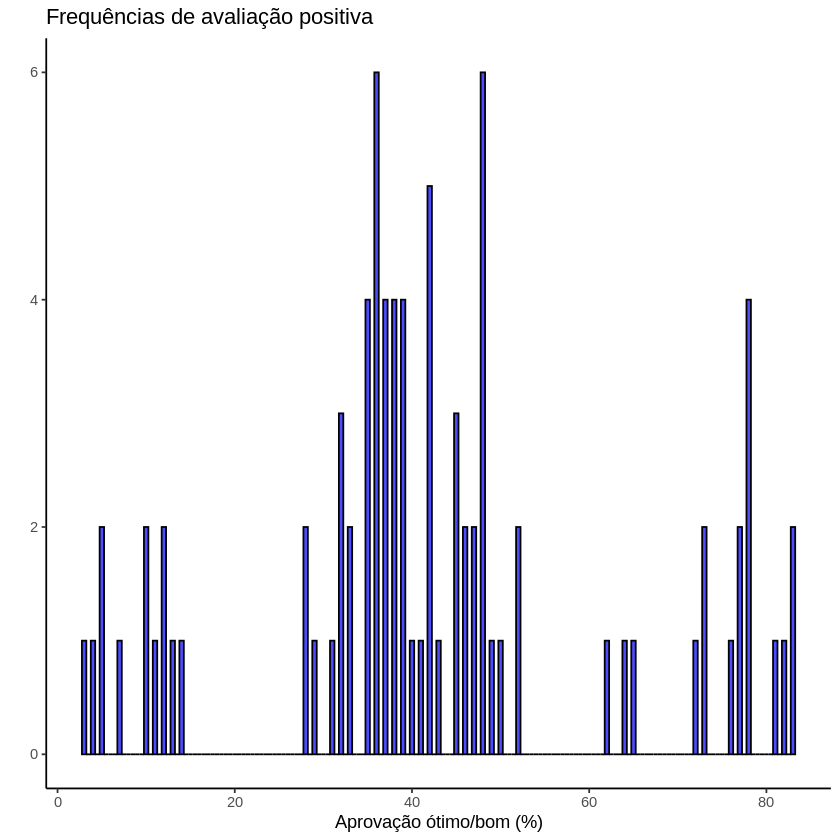

In [28]:
# Observar a frequencia de avalição positica do governo dentro da série
ggplot(dados, aes(x = otimo)) +
  geom_histogram(binwidth = 0.5, color = "black", fill = "blue", alpha = 0.7) +
  labs(x = "Aprovação ótimo/bom (%)", y = "", title = "Frequências de avaliação positiva") +
  theme_classic()

* Fica evidente a concentração das avalições do periodo observado tendem a ser em média de 42%.

* Levando em consideração o recorte observado (2003 a 2021), notamos que há uma grande variação econômica e adoção de politicas públicas.




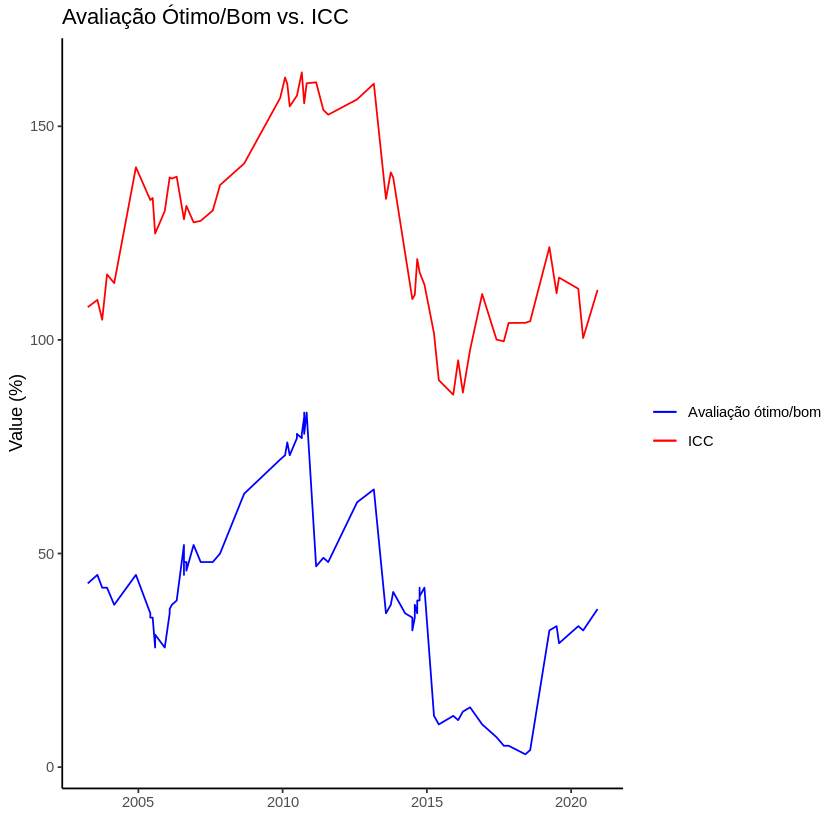

In [30]:
ggplot(dados) +
  geom_line(aes(x = month, y = otimo, color = "Avaliação ótimo/bom")) +
  geom_line(aes(x = month, y = icc, color = "ICC")) +
  labs(x = "", y = "Value (%)", title = "Avaliação Ótimo/Bom vs. ICC") +
  scale_color_manual(values = c("blue", "red"), name = "") +
  theme_classic()

* Puramente analisando pelo contraste visual consegue-se observar a correlação entre as variações das séries, esta relação será melhor observada na dispersão a seguir.

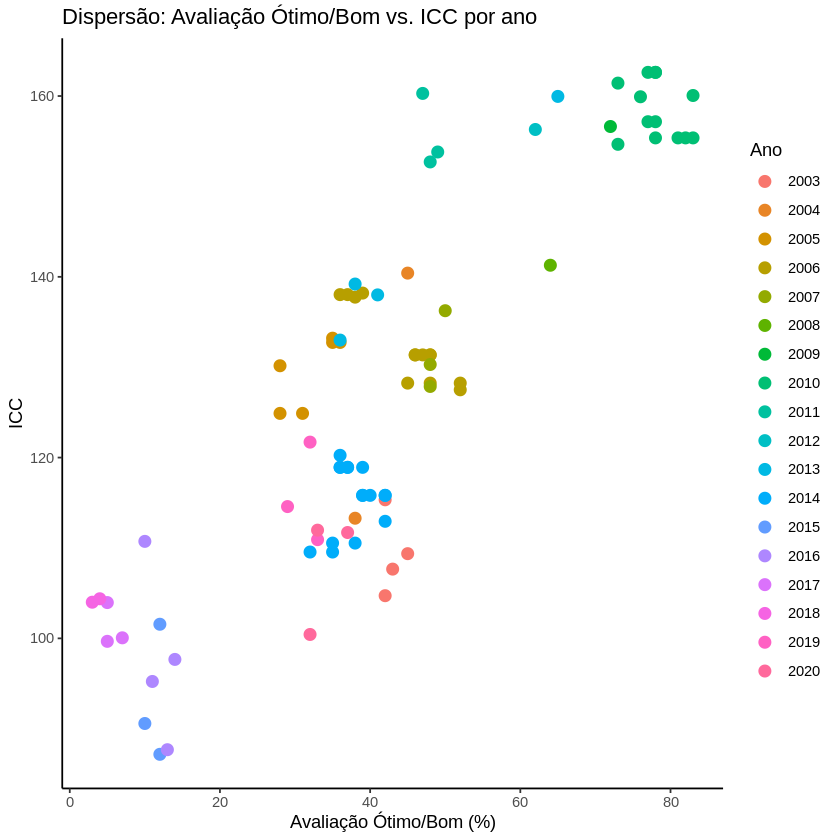

In [40]:
ggplot(dados) +
  geom_point(aes(x = otimo, y = icc, color = factor(year)), size = 3) +
  labs(x = "Avaliação Ótimo/Bom (%)", y = "ICC", title = "Dispersão: Avaliação Ótimo/Bom vs. ICC por ano") +
  scale_color_discrete(name = "Ano") +
  theme_classic()

* Observando a dispersão é possivel perceber a tendencia de proporcionalidade direta entre as séries. E visando encontrar mais variáveis estatisticamente relevantes, é estudado algumas variáveis do dataset a seguir:

TableGrob (3 x 2) "arrange": 6 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]
6 6 (3-3,2-2) arrange gtable[layout]


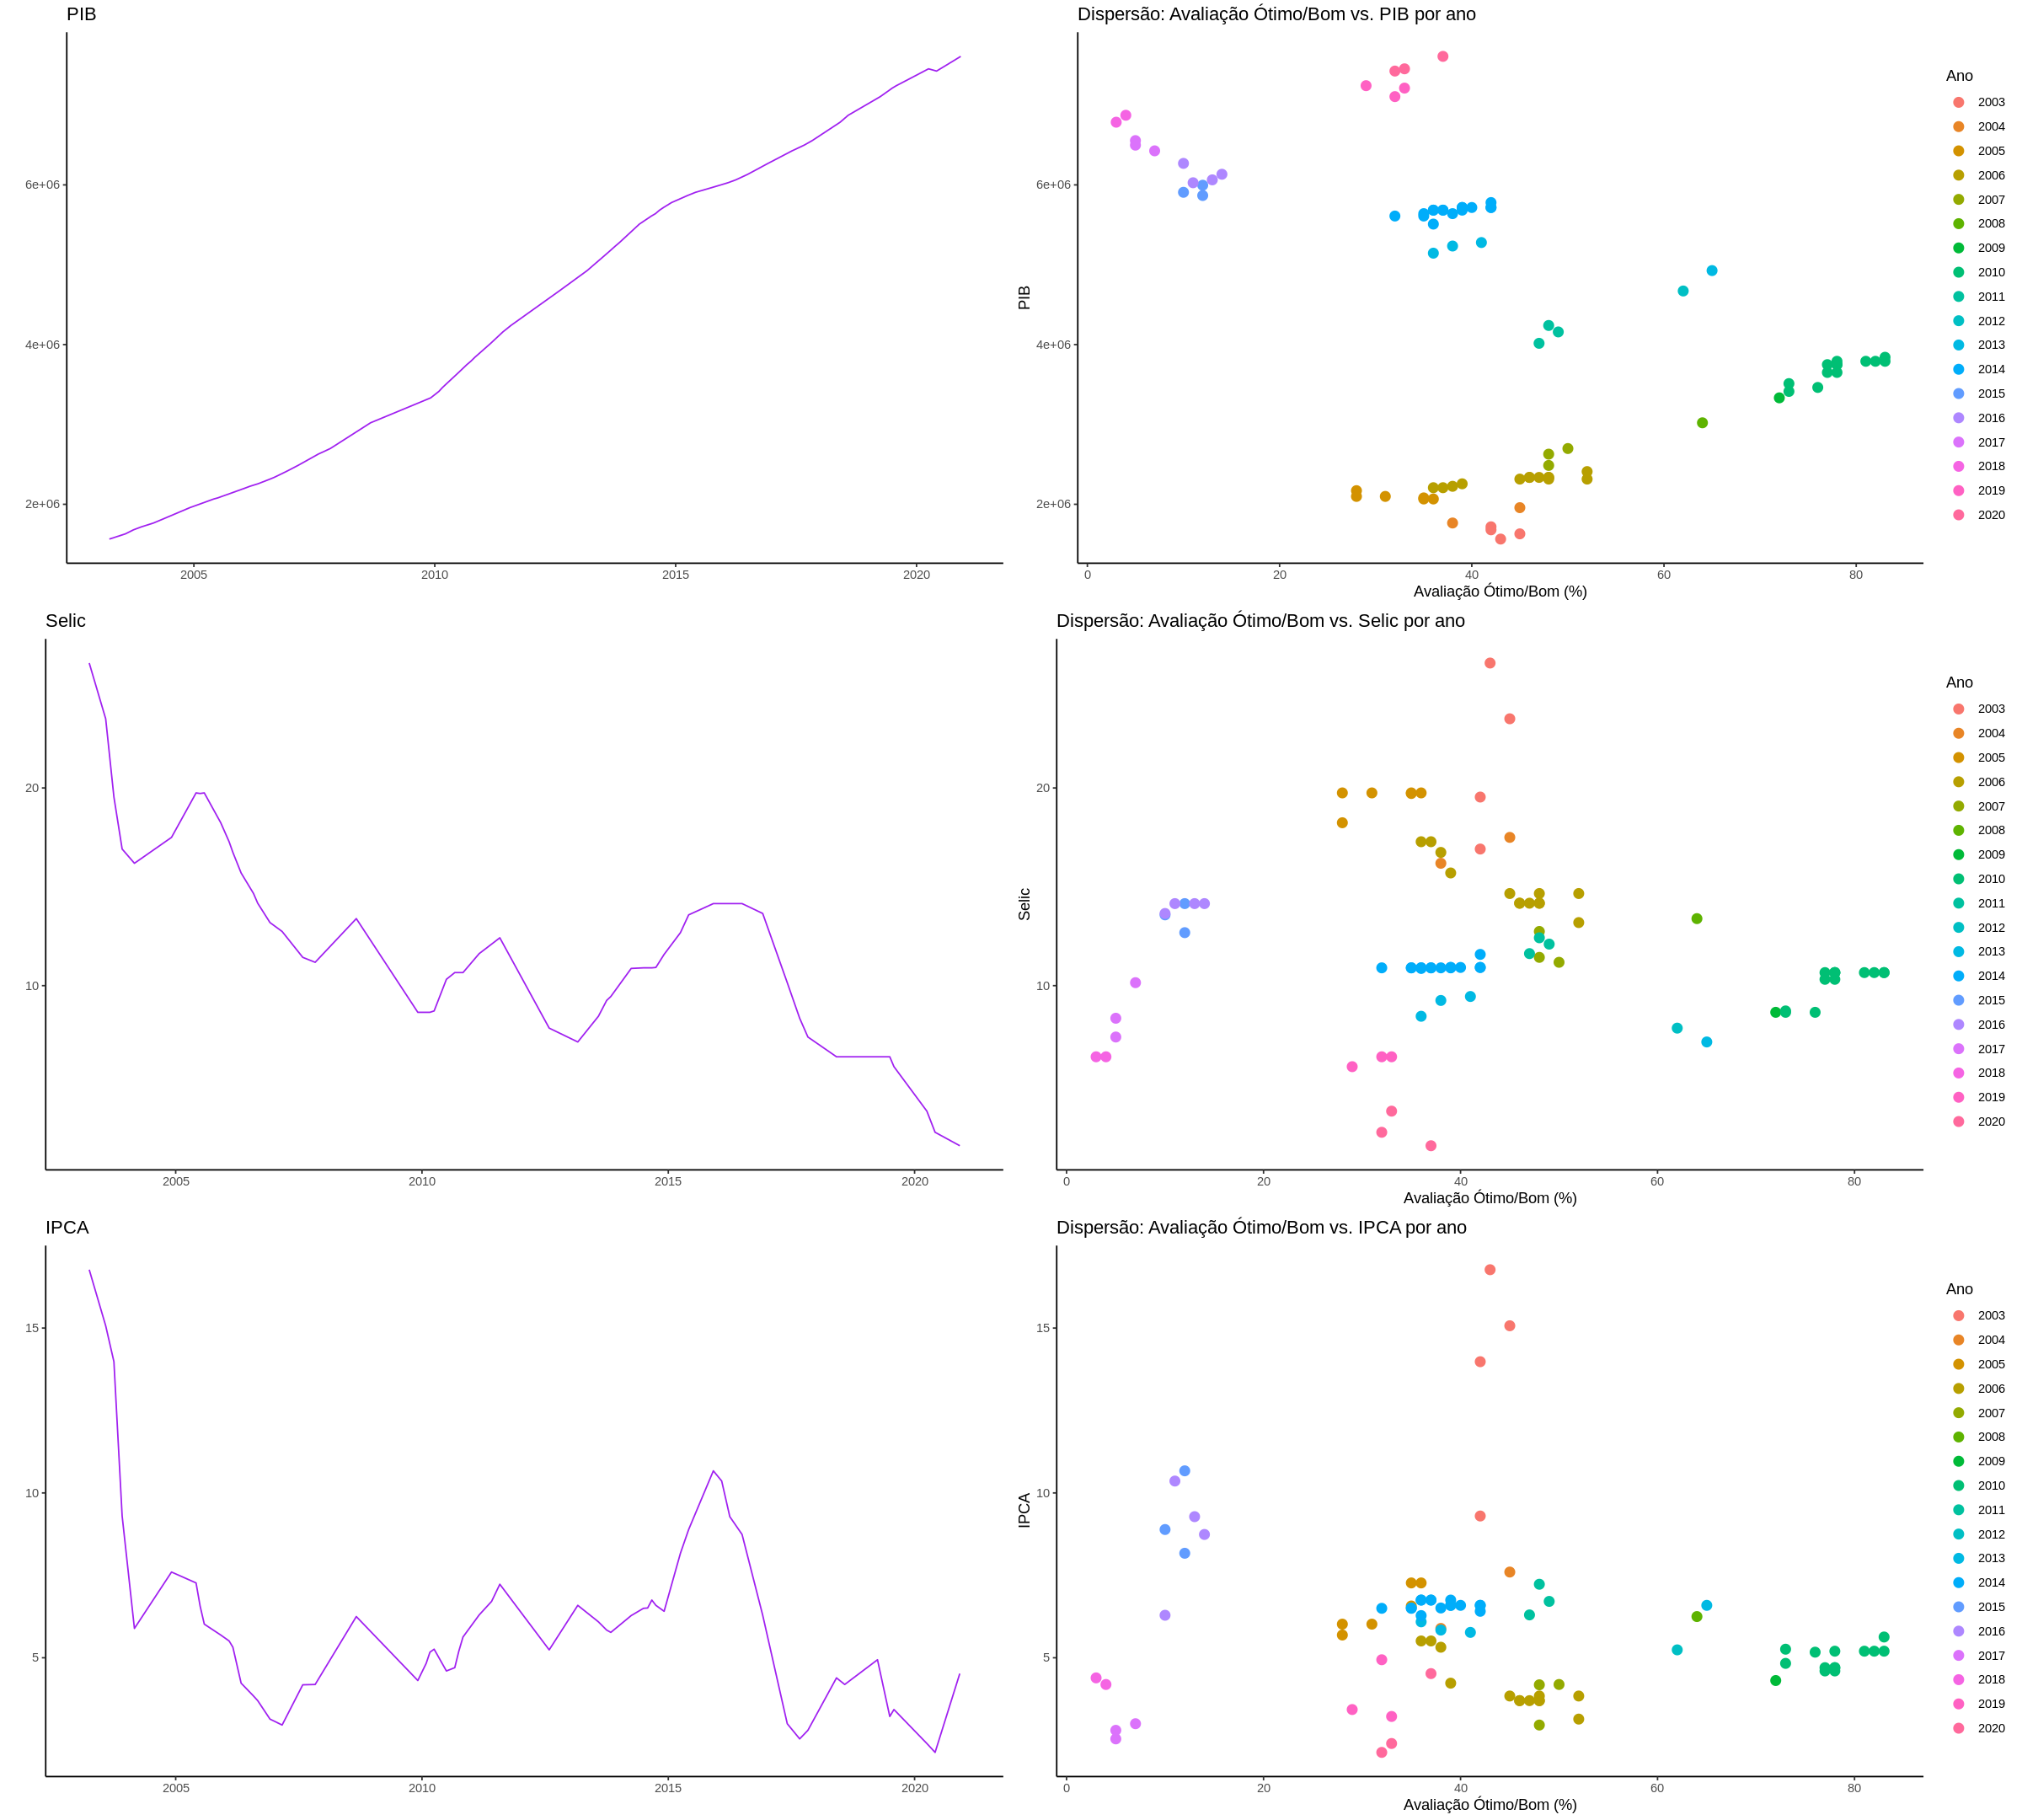

In [71]:
options(repr.plot.width = 20, repr.plot.height = 18)

p1 <- ggplot(dados) +
  geom_line(aes(x = month, y = pib), color = "purple") +
  labs(x = "", y = "", title = "PIB") +
  theme_classic()

p2 <- ggplot(dados) +
  geom_point(aes(x = otimo, y = pib, color = factor(year)), size = 3) +
  labs(x = "Avaliação Ótimo/Bom (%)", y = "PIB", title = "Dispersão: Avaliação Ótimo/Bom vs. PIB por ano") +
  scale_color_discrete(name = "Ano") +
  theme_classic()

p3 <- ggplot(dados) +
  geom_line(aes(x = month, y = selic), color = "purple") +
  labs(x = "", y = "", title = "Selic") +
  theme_classic()

p4 <- ggplot(dados) +
  geom_point(aes(x = otimo, y = selic, color = factor(year)), size = 3) +
  labs(x = "Avaliação Ótimo/Bom (%)", y = "Selic", title = "Dispersão: Avaliação Ótimo/Bom vs. Selic por ano") +
  scale_color_discrete(name = "Ano") +
  theme_classic()

p5 <- ggplot(dados) +
  geom_line(aes(x = month, y = ipca), color = "purple") +
  labs(x = "", y = "", title = "IPCA") +
  theme_classic()


p6 <- ggplot(dados) +
  geom_point(aes(x = otimo, y = ipca, color = factor(year)), size = 3) +
  labs(x = "Avaliação Ótimo/Bom (%)", y = "IPCA", title = "Dispersão: Avaliação Ótimo/Bom vs. IPCA por ano") +
  scale_color_discrete(name = "Ano") +
  theme_classic()

painel <- grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 2)

print(painel)

# Modelo proposto

## Pergunta

**Há uma relação entre indicadores macroeconomicos e popularidade do governo?**

## Índice de significância

* α = 5%

## Variável Dependente

> otimo

Porcentagem de aprovação do governo com Ótimo e Bom na série histórica do IBOPE/CNI

## Variáveis Independentes

> icc        

Índice de confiança do consumidor

> varejo

Vendas reais no varejo: índice dessazonalizado

> usd_brl    

Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal

> div_gov

Dívida Líquida do Governo Geral (% PIB)

> ibc

Índice de Atividade Econômica do Banco Central com ajuste sazonal

> ipca       

Índice nacional de preços ao consumidor amplo acumulado em 12 meses (%)

> pib  

PIB acumulado dos últimos 12 meses - Valores correntes - R$ (bilhões)

> sal_min

Salário mínimo

> selic      

Taxa de juros Selic acumulada no mês anualizada base 252 (% a.a.)

> ibovespa

Índice Bovespa - Evolução mensal do fechamento (mil pontos)




## Modelo econométrico

Notar que todas as variáveis independentes estão sendo consideradas t-1, já que a pesquisa de opinião é reflexo do mês anterior.

In [76]:
modelo =
  lm(otimo ~
    lag(icc,1)
    + lag(varejo,1)
    + lag(usd_brl ,1)
    + lag(div_gov ,1)
    + lag(ibc  ,1)
    + lag(ipca ,1)
    + lag(pib ,1)
    + lag(sal_min ,1)
    + lag(selic  ,1)
    + lag(ibovespa ,1),
    data = dados)

summary(modelo)


Call:
lm(formula = otimo ~ lag(icc, 1) + lag(varejo, 1) + lag(usd_brl, 
    1) + lag(div_gov, 1) + lag(ibc, 1) + lag(ipca, 1) + lag(pib, 
    1) + lag(sal_min, 1) + lag(selic, 1) + lag(ibovespa, 1), 
    data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.2143  -5.4028   0.6998   5.8146  18.5170 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.527e+02  1.070e+02   1.428 0.157673    
lag(icc, 1)       2.676e-01  1.163e-01   2.301 0.024289 *  
lag(varejo, 1)    1.370e+00  8.595e-01   1.594 0.115241    
lag(usd_brl, 1)   5.180e+00  6.087e+00   0.851 0.397565    
lag(div_gov, 1)  -9.207e-01  6.248e-01  -1.473 0.144983    
lag(ibc, 1)      -1.317e+00  1.024e+00  -1.286 0.202616    
lag(ipca, 1)      2.005e+00  7.936e-01   2.526 0.013731 *  
lag(pib, 1)      -1.854e-05  1.060e-05  -1.749 0.084547 .  
lag(sal_min, 1)  -1.820e-02  5.506e-02  -0.331 0.741951    
lag(selic, 1)    -2.256e+00  8.803e-01  -2.562 0.012489 *  
la

* Observando o modelo econométrico idealizado, constatamos que para o nosso nível de significância escolhido há necessdidade de desconsiderar certas variáveis independentes. Nisso ajusta-se o modelo para refletir esse contexto:

In [88]:
modelo_ajustado =
  lm(otimo ~
    lag(icc,1)
    -1
    + lag(ipca ,1)
    + lag(pib ,1)
    + lag(selic  ,1),
    data = dados)

summary(modelo_ajustado)


Call:
lm(formula = otimo ~ lag(icc, 1) - 1 + lag(ipca, 1) + lag(pib, 
    1) + lag(selic, 1), data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.231  -5.773   2.121   7.631  16.887 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
lag(icc, 1)    6.665e-01  3.420e-02  19.491  < 2e-16 ***
lag(ipca, 1)   2.308e+00  6.435e-01   3.586 0.000576 ***
lag(pib, 1)   -5.633e-06  6.322e-07  -8.910 1.32e-13 ***
lag(selic, 1) -2.635e+00  3.956e-01  -6.662 3.14e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.37 on 80 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9541,	Adjusted R-squared:  0.9518 
F-statistic:   416 on 4 and 80 DF,  p-value: < 2.2e-16


* Considerando que todas as variáveis agora estão dentro do grau de significância escolhido, pode-se rejeitar a hipotese nula de que há variáveis não estatisticamente relevantes no modelo.

* Olhando parao R-quadrado, pode-se afirmar que há uma redução significativa do nível de variabilidade inicialmente obeservada. Entretanto, há risco de um valor alto ser indicador de overfitting.

* Proxímo ponto será a observação dos resíduos, para poder concluir que não houve descarte de dados estatisticamente relevantes.

## Resíduos

In [89]:
residuos = residuals(modelo_ajustado)

In [90]:
stargazer(data.frame(residuos), digits = 2, type = "text")


Statistic N  Mean St. Dev.  Min    Max 
---------------------------------------
residuos  84 0.09  10.19   -39.23 16.89
---------------------------------------


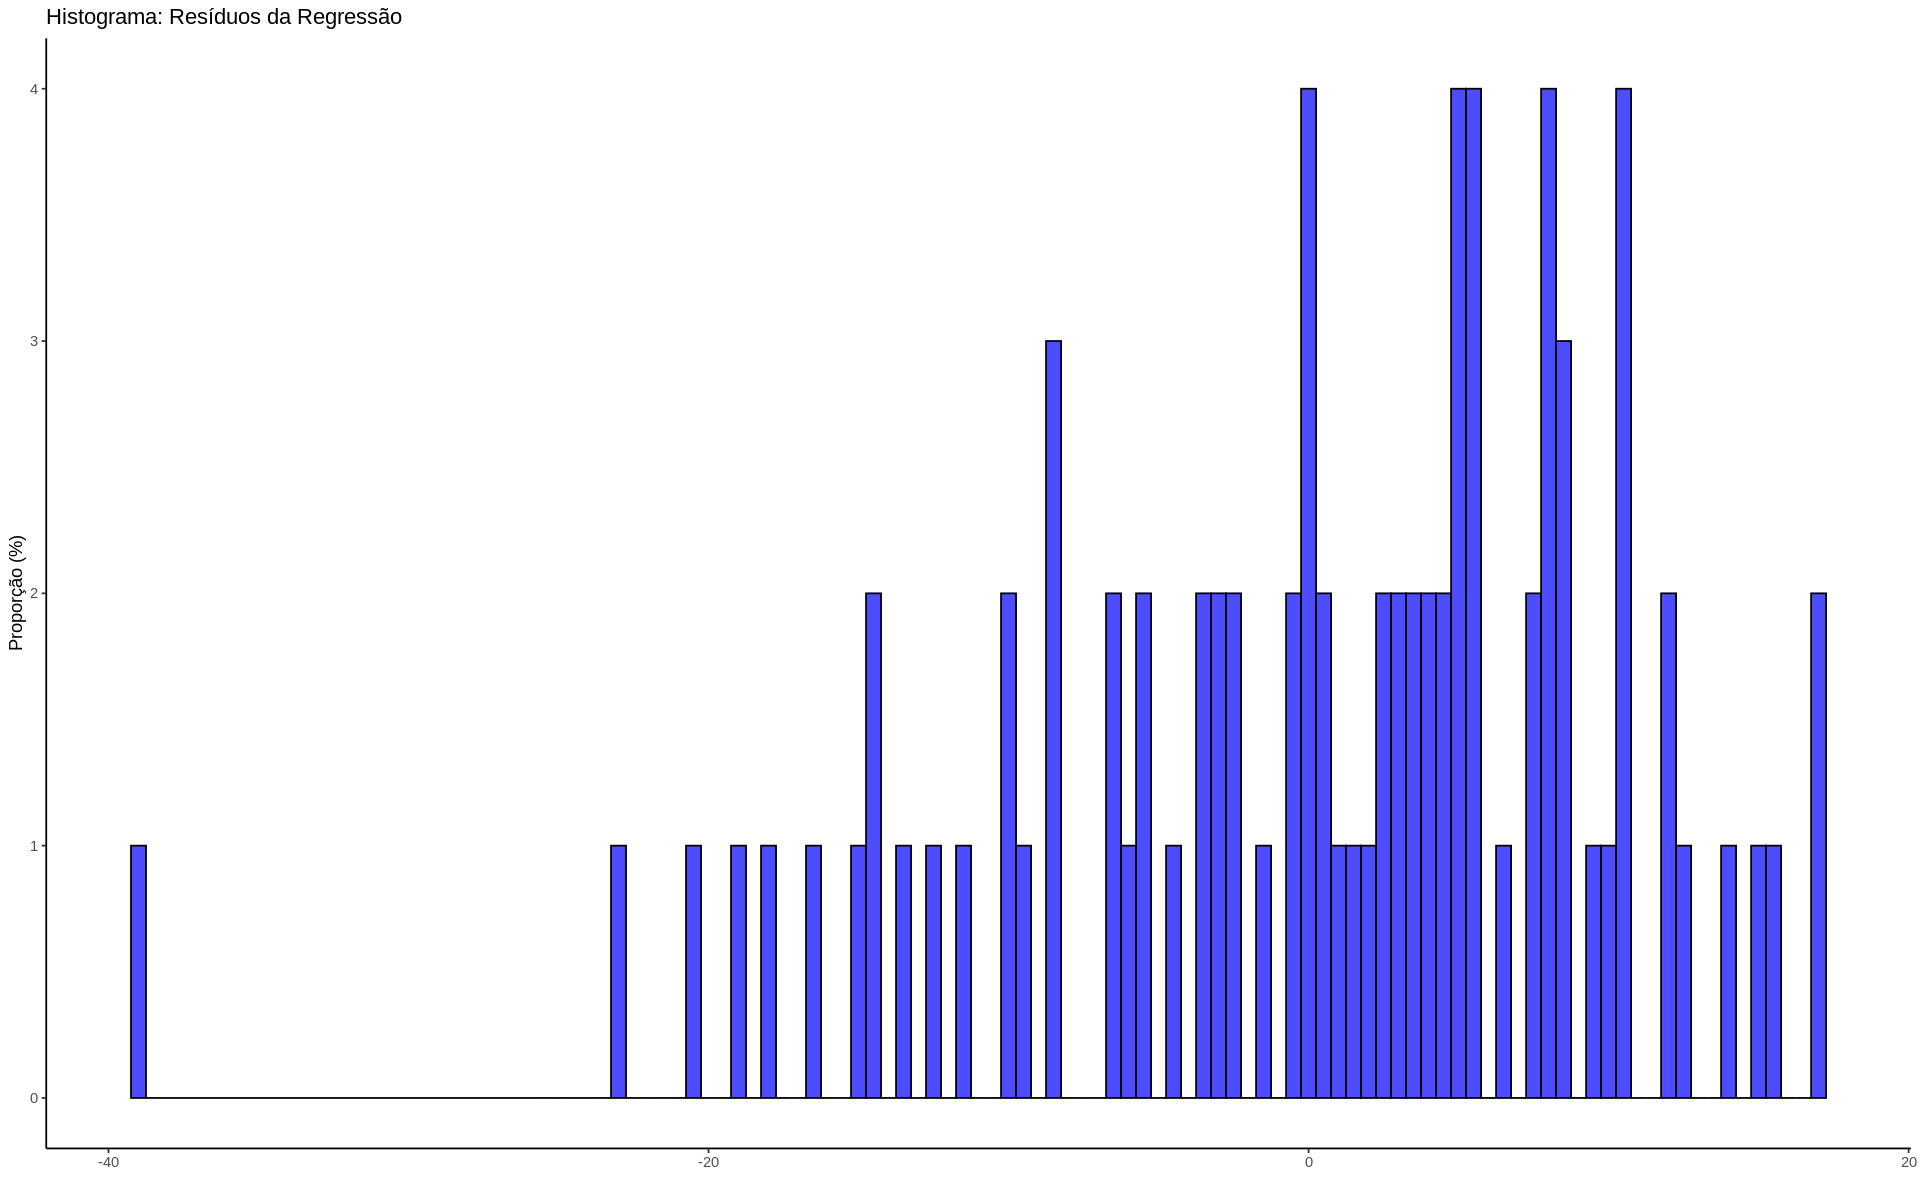

In [82]:
options(repr.plot.width = 16, repr.plot.height = 10)
ggplot(data.frame(residuos), aes(x = residuos)) +
  geom_histogram(binwidth = 0.5, color = "black", fill = "blue", alpha = 0.7) +
  labs(title = "Histograma: Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_classic()

* Os resíduos apresentam uma média muito proxíma ao zero, indicando uma boa cobertura das variáveis que compõe o modelo.

* Entretanto, não é garantia de estacionariedade, relevante para poder montar um modelo preditivo. Dessa forma será realizados testes para avaliar a hipótese nula.

## Teste de raiz unitária

> ADF - (Augmented Dickey-Fuller)

In [53]:
summary( ur.df( residuos, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.079  -4.393   0.282   5.916  15.808 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.68479    3.14663   1.171   0.2465  
z.lag.1      -0.58285    0.22794  -2.557   0.0133 *
tt           -0.06553    0.06044  -1.084   0.2829  
z.diff.lag1   0.08194    0.21874   0.375   0.7094  
z.diff.lag2   0.01901    0.20987   0.091   0.9281  
z.diff.lag3   0.22965    0.19791   1.160   0.2508  
z.diff.lag4   0.08650    0.19496   0.444   0.6590  
z.diff.lag5   0.29769    0.18536   1.606   0.1139  
z.diff.lag6   0.09586    0.19551   0.490   0.6258  
z.diff.lag7   0.29066    0.18639   1.559   0.1245  
z.diff.lag8   0.10667    0.18174   0.587   0.5596  
z.diff.lag9   0.16104    0.17129  

* Observa-se que, para o grau de siginificância escolhido, os valores de tau3, phi2 e phi3 são maiores que os calculados pelo teste, portanto, não se rejeita a hipótese nula e significa que há raiz unitária implicando que os residuos não são estacionários.

> KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

In [54]:
summary( ur.kpss( residuos, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.128 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


* Observando que o valor calculado pelo teste é, em módulo, menor que o valor para o grau de significância escolhido. Com isso rejeita-se a hipótese nula, logo não há raiz unitária, implicando que os residuos são estacionários.